***First i have loaded the dataset***

In [ ]:
import pandas as pd
file_path = 'food delivery costs.csv'
data = pd.read_csv(file_path)
data.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


***Here i have checked whether the dataset is cleaned or not by using "info".***

In [14]:
import pandas as pd
file_path = 'food delivery costs.csv'
data = pd.read_csv(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


***Here the "delivery date and time" and "order date and time" is in object datatype,but it should be in datetime datatype.***

In [32]:

data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'])
data['Delivery Date and Time'] = pd.to_datetime(data['Delivery Date and Time'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
 12  Total Revenue           1000 non-null   int64    

***After cleaning the data, i have calculated Total revenue,Total cost and Total profit.***

In [30]:
data['Total Revenue'] = data['Order Value'] + data['Delivery Fee']
data['Total Cost'] = data['Commission Fee'] + data['Payment Processing Fee'] + data['Refunds/Chargebacks']
data['Total Profit'] = data['Total Revenue'] - data['Total Cost']

total_revenue = data['Total Revenue'].sum()
total_cost = data['Total Cost'].sum()
total_profit = data['Total Profit'].sum()

print(f"Total Revenue: ₹{total_revenue}")
print(f"Total Cost: ₹{total_cost}")
print(f"Total Profit: ₹{total_profit}")


Total Revenue: ₹1082589
Total Cost: ₹185122
Total Profit: ₹897467


***To find the most popular payment method***

In [33]:
popular_payment_method = data['Payment Method'].mode()[0]
print(f"Most Popular Payment Method: {popular_payment_method}")


Most Popular Payment Method: Cash on Delivery


***Calculated the number of orders for each type of discounts.***

In [34]:
discount_order_volume = data.groupby('Discounts and Offers').size()
print("Order Volume by Discounts:")
print(discount_order_volume)

Order Volume by Discounts:
Discounts and Offers
10%             233
15% New User    198
5% on App       183
50 off Promo    201
dtype: int64


***Calculated the average delivery time of the orders.***

In [15]:
data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'])
data['Delivery Date and Time'] = pd.to_datetime(data['Delivery Date and Time'])
data['Delivery Time'] = data['Delivery Date and Time'] - data['Order Date and Time']
average_delivery_time = data['Delivery Time'].mean
print(average_delivery_time)

<bound method Series.mean of 0     0 days 01:28:00
1     0 days 00:35:00
2     0 days 00:58:00
3     0 days 00:46:00
4     0 days 01:29:00
            ...      
995   0 days 00:42:00
996   0 days 01:20:00
997   0 days 01:01:00
998   0 days 01:44:00
999   0 days 00:53:00
Name: Delivery Time, Length: 1000, dtype: timedelta64[ns]>


***Identifying top performing restaurants by order value***

In [39]:
top_restaurants = data.groupby('Restaurant ID')['Order Value'].sum().nlargest(3)
print("Top Performing Restaurants by Order Value:")
print(top_restaurants)

Top Performing Restaurants by Order Value:
Restaurant ID
R2726    6794
R2083    6291
R2933    6049
Name: Order Value, dtype: int64


***After gaining the insights from the dataset,i have visualized it using matplotlib and seaborn for better undertanding.***

***Here i have used bar plot for giving financial overview(total cost,revenue and profit).***

<ipython-input-21-00b5e618e989>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=totals, palette='viridis')


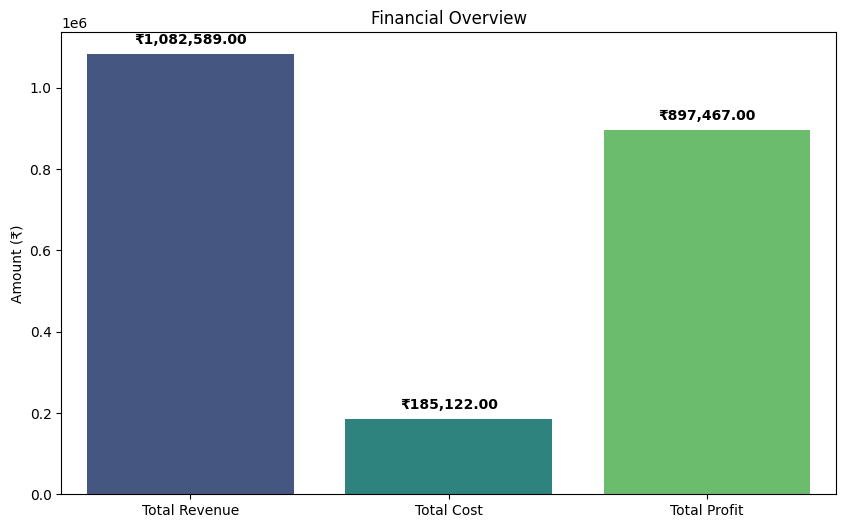

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'food delivery costs.csv'
data = pd.read_csv(file_path)

data['Total Revenue'] = data['Order Value'] + data['Delivery Fee']
data['Total Cost'] = data['Commission Fee'] + data['Payment Processing Fee'] + data['Refunds/Chargebacks']
data['Total Profit'] = data['Total Revenue'] - data['Total Cost']


plt.figure(figsize=(10, 6))
totals = [data['Total Revenue'].sum(), data['Total Cost'].sum(), data['Total Profit'].sum()]
labels = ['Total Revenue', 'Total Cost', 'Total Profit']


ax = sns.barplot(x=labels, y=totals, palette='viridis')


for i, total in enumerate(totals):
    ax.annotate(f'₹{total:,.2f}', xy=(i, total), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Financial Overview')
plt.ylabel('Amount (₹)')
plt.show()

***Distribution of different payments method using pie chart.***

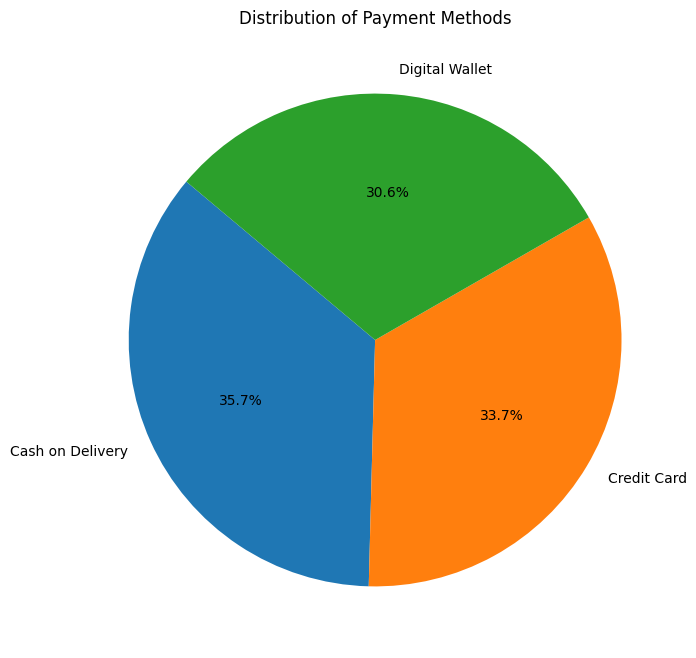

In [22]:

plt.figure(figsize=(8, 8))
payment_counts = data['Payment Method'].value_counts()
payment_counts.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Methods')
plt.ylabel('')
plt.show()

***Order volume by discounts using bar plot.***

<ipython-input-23-ad4b59f15fad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discount_order_volume.index, y=discount_order_volume.values, palette='viridis')


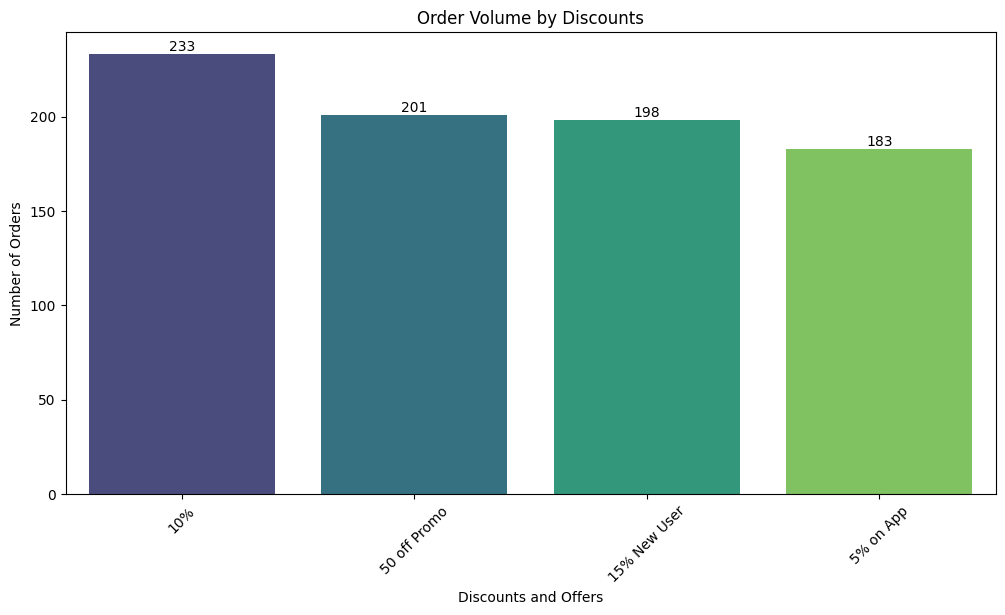

In [23]:

plt.figure(figsize=(12, 6))
discount_order_volume = data['Discounts and Offers'].value_counts()

sns.barplot(x=discount_order_volume.index, y=discount_order_volume.values, palette='viridis')
plt.title('Order Volume by Discounts')
plt.xlabel('Discounts and Offers')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)


for index, value in enumerate(discount_order_volume.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

***First i have converted the delivery time into hours.Then i have distributed the delivery times using histogram.***

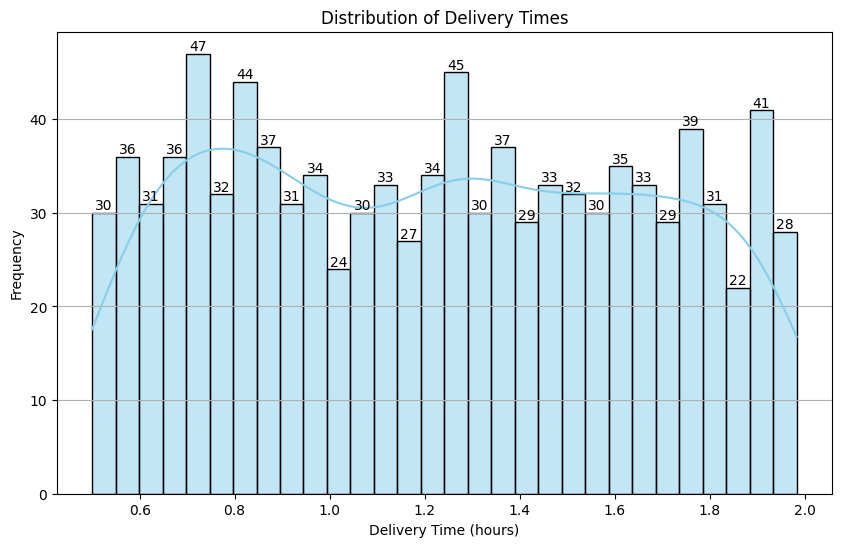

In [25]:

data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'])
data['Delivery Date and Time'] = pd.to_datetime(data['Delivery Date and Time'])

data['Delivery Time'] = data['Delivery Date and Time'] - data['Order Date and Time']
data['Delivery Time (hours)'] = data['Delivery Time'].dt.total_seconds() / 3600


plt.figure(figsize=(10, 6))
sns.histplot(data['Delivery Time (hours)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (hours)')
plt.ylabel('Frequency')
plt.grid(axis='y')


for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(),
             f'{int(p.get_height())}', ha='center', va='bottom')

plt.show()

***Top performing restaurants by order value using barplot.***

<ipython-input-28-fc8e67189b4b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_restaurants.index, y=top_restaurants.values, palette='viridis')


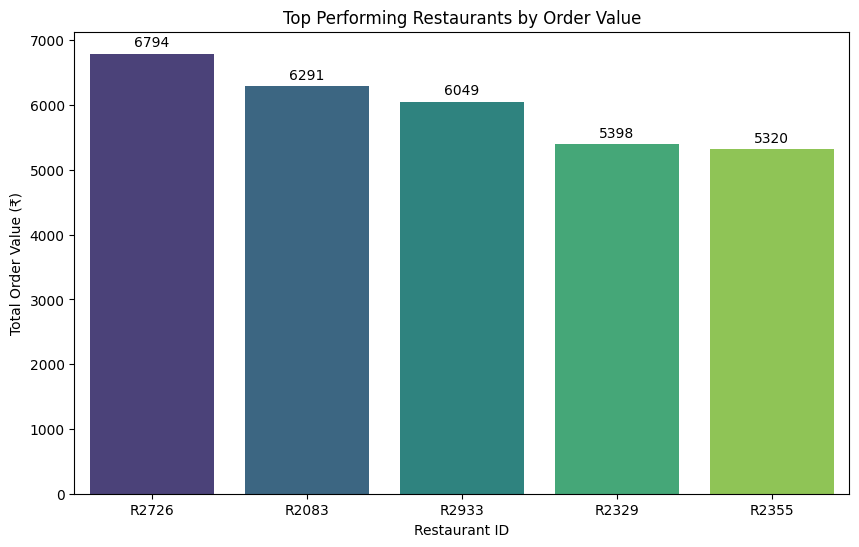

In [28]:

top_restaurants = data.groupby('Restaurant ID')['Order Value'].sum().nlargest(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_restaurants.index, y=top_restaurants.values, palette='viridis')


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 8),
                textcoords = 'offset points')

plt.title('Top Performing Restaurants by Order Value')
plt.xlabel('Restaurant ID')
plt.ylabel('Total Order Value (₹)')
plt.show()